# CSE5ML: Machine Learning
# Assessment 2: Image Classification with Neural Networks

## Completion Requirements

- **Working code and written report**
- **Due date:** 11.59 pm (AEST), Sunday 14 September 2025 (Week 7)
- **Weighting:** 30%
- **Length:** Working code and 1000-word report (+/– 10%)
- **SILOs:** Implement a neural network with different learning algorithms for time-series forecasting with real-world data from industry (SILO 4).

## Purpose

The purpose of this assessment is to develop hands-on experience with neural networks for image classification – a key application of machine learning used across industries such as health care, autonomous systems and digital security to interpret and act on visual data.

## Task Details

This assessment aims to consolidate your knowledge and practical skills to build neural networks (NNs) for supervised learning. The task is formulated as a multi-class classification problem for handwritten images, and the goal is to model the relationship between the images’ content, network structure and labels. You need to provide:

- **Working code** (part 1)
- **A written report** of 1000 words on the method and results (part 2).

### Instructions

The MNIST database is a dataset with handwritten digits (from 0 to 9). The digits have been size-normalised and centred in a fixed-size image (28 × 28 pixels) with values from 0 to 1. You can use the following code with TensorFlow in Python to download the data.

```python
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
```

Every MNIST data point has two parts: an image of a handwritten digit and a corresponding label. We will call the images 𝑥 and the labels 𝑦. Both the training set and test set contain 𝑥 and 𝑦.
Each image is 28 pixels by 28 pixels.
As mentioned, the corresponding labels in the MNIST are numbers between 0 and 9, describing which digit a given image represents. In this assessment, we regard the labels as one-hot vectors; that is, 0 in most dimensions, and 1 in a single dimension. In this case, the 𝑛-th digit will be represented as a vector, which is 1 in the 𝑛 dimensions. For example, 3 would be [0,0,0,1,0,0,0,0,0,0].
The assessment aims to build NNs for classifying handwritten digits in the MNIST database, train it on the training set and test it on the test set. Since the main object of this assessment is for you to understand the relationship between input, model and output, you are not expected to achieve very high accuracy in model performance; instead, for each task, you should be able to identify how you can improve model performance with the change of network structure.

There are two parts to this assessment:

### Part 1
Part 1 is comprised of three main tasks:

**Task 1**

Build a neural network without convolutional layers to do the classification task (hint: you will need the use of dense layers). Then you can change the model structure (i.e. number of dense layers, number of neurons in dense layers or activation functions) to be able to improve network performance.

**Task 2**

Build a neural network with the use of convolutional layers (you can decide other layer types you want to include in your network). Then you can change the number of convolutional layers and the number of filters or activation functions in the convolutional layers to be able to improve network performance.

**Task 3**

Change the type of optimiser or learning rate that you applied in the previous tasks and see how these changes can influence model performance. (You can keep the final network structure you applied in task 2 and try at least one different optimiser setting.)
Please read the following comments and requirements very carefully before starting the assessment:
1.	The assessment is based on the content of labs and Weeks 1–3.
2.	In Week 1 we talked about the use of training set, validation set and test set in machine learning. In this assessment, you are asked to train the NN on the training set and test the NN on the test set, without any given validation set. (If you want to monitor the training process, you can also try what we did in Week 3: you can consider the validation set is the same as the test set in this assessment.)
3.	In the assessment, the performance of an NN is measured by its prediction accuracy in classifying images from the test set (i.e. number of the correctly predicted images/number of the images in the test set).
4.	Since the MNIST dataset is a black-and-white image dataset, the shape of dataset is (dataset_length, 28,28). But to fit it into a conv2d layer, we need to make the input shape comply with its required format: (batch_size, image_width, image_depth, image_channels). Although batch_size can be decided later when you train it, you will still need to tell the number of image channels here. You can consider reshaping the dataset into (dataset_length, 28,28,1) or add one more dimension at the end with np.newaxis.
5.	You are expected to show at least two models in for tasks 1 and 2: one for the model you start with, and another model is the model that you identified to have better accuracy. For task 3, you need to show what optimiser and/or learning rate you applied.

### Part 2

Your report must at least contain the following content:
1.	Your name and student number.
2.	Architectures of the NNs, with figures for tasks 1 and 2.
3.	Description on the optimiser and learning rate you applied in the final model of task 2 and the optimiser or change of learning rate you used in task 3.
4.	Experiments and performances, with parameter setting.
5.	Discussion on the improvement/deterioration of the NN’s performance after changing the architecture and parameter setting for each task and findings of comparing the results from all three tasks.
6.	The ranking of all NNs’ performances from all the three tasks.

### Assessment criteria

This assessment will measure your ability to:

**Part 1:**

•	describe the two models, experiment settings and compare the results for task 1 (25%)
•	describe the two models, experiment settings and compare the results for task 2 (25%)
•	describe the two optimisers or learning rates, experiment settings and compare the results for task 3 (35%)

**Part 2:**

•	demonstrate correct code quality (10%)
•	research extensively and demonstrate depth of thinking; produce a well-structured report (5%).
Refer to the marking guide for marking and feedback information.

### Submission details

The submitted assessment consists of (1) a report (in PDF format) of no less than 1000 words and (2) all codes for modelling, training and testing the NN with TensorFlow in Python (you can choose to have one code file including all your codes, or you can have one code file for each task separately).
**If you use ChatGPT or other generative AI tools, you must cite them and clearly indicate your original contributions.**

In keeping with La Trobe University policy, all assignments are to be submitted in Moodle via Turnitin.
To be accepted, your assessment submission **must** generate a similarity score (you are responsible for checking this). Submitting in Word or PDF format is the best way to do this. If your submission does not generate a similarity score, it cannot be checked for plagiarism and therefore **will not be marked.**

Last modified: Tuesday, 12 August 2025, 8:58 PM




# Part 1, task 1 & 3

### Import relevant dependencies 

In [1]:
# Imports the MNIST dataset from Keras, a classic collection of 70,000 grayscale images of handwritten digits (0-9).
from keras.datasets import mnist 

# Imports TensorFlow, the core open-source library from Google for building and training machine learning models. We use the alias 'tf' by convention.
import tensorflow as tf

# Imports the Adam optimiser. An optimiser is an algorithm that adjusts the model's internal parameters (weights) to minimise the error, and Adam is a popular, efficient choice.
from tensorflow.keras.optimizers import Adam, SGD

# Imports specific performance metrics. Metrics are used to evaluate how well the model is performing.
# Precision: Measures the accuracy of positive predictions.
# Recall: Measures the model's ability to find all the actual positive instances.
# Accuracy: Measures the overall fraction of correct predictions.
from tensorflow.keras.metrics import Precision, Recall, Accuracy

# Imports the History callback object. A 'callback' is a function that can be executed at different stages of training. The History object automatically records the metrics and loss values from each epoch.
from tensorflow.python.keras.callbacks import History

# Imports the ModelCheckpoint callback. This callback saves the model to a file during training, typically only when its performance on a validation metric improves.
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard

from tensorflow.keras.utils import plot_model

# Imports the Pandas library, a powerful tool for data manipulation and analysis. It's mainly used for working with structured data in tables called DataFrames. 'pd' is the standard alias.
import pandas as pd

# Imports the Sequential model type from Keras. This is the simplest way to build a model, by creating a linear stack of layers.
from keras.models import Sequential

# Imports different types of layers, which are the fundamental building blocks of a neural network.
# Dense: A standard, fully-connected layer where each neuron is connected to every neuron in the previous layer.
# Input: A special layer used to define the shape and data type of the model's input.
# Flatten: A layer that transforms a multi-dimensional input (like a 2D image) into a one-dimensional vector.
# Normalization: A preprocessing layer that scales input data to a standard range (e.g., mean of 0, standard deviation of 1), which helps the model train faster. 
from tensorflow.keras.layers import Dense, Input, Flatten, Normalization, Input, Conv2D, MaxPooling2D, Dropout

# Imports a utility function from scikit-learn, a popular library for traditional machine learning. train_test_split is used to split a single dataset into separate training and testing sets.
from sklearn.model_selection import train_test_split

# Imports the pyplot interface from Matplotlib, which is the most widely used library for creating plots and visualisations in Python. 'plt' is the standard alias.
import matplotlib.pyplot as plt

# Imports the NumPy library, which is the foundation for numerical computing in Python. It provides support for large, multi-dimensional arrays and a wide range of mathematical functions. 'np' is the standard alias.
import numpy as np

# Imports a data scaling tool from scikit-learn. MinMaxScaler scales all data features to a specific range, usually 0 to 1.
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report

# Imports tools for 'type hinting' from Python's typing module. Type hints make code more readable and can be used by external tools to check for errors.
# Tuple: Used to hint that a variable or function return is a tuple (an ordered, immutable collection of elements).
from typing import Tuple

# Imports a specific type hint from NumPy's typing module.
# NDArray: Used to hint that a variable is a NumPy n-dimensional array, which is more descriptive than a generic type.
from numpy.typing import NDArray

# Imports the 'os' module. This library provides a way for Python to interact with the computer's underlying operating system.
# We use it for tasks like reading file names from a folder (os.listdir()) and constructing file paths that work correctly on any system, like Windows, Mac, or Linux (os.path.join()).
import os 

# Imports the 're' module, which stands for Regular Expression. This is Python's library for advanced pattern matching in strings.
# We use it to find and extract specific pieces of text from a string, like pulling the accuracy score out of a complex filename (e.g., finding '0.9935' in 'model_acc-0.9935.keras').
import re

import seaborn as sns

import wandb

from wandb.integration.keras import WandbMetricsLogger, WandbModelCheckpoint

import datetime


### Define the training set features (X_train) and target variable (Y_train) as well as the test set features (X_test_) and target variable (Y_test)

New shape for X_train for CNN's: (60000, 28, 28, 1)
New shape for X_test for CNN's: (10000, 28, 28, 1)
Shape of X_train:	 (60000, 28, 28, 1)
Shape of X_test:	 (10000, 28, 28, 1)
Shape of Y_train:	 (60000,)
Shape of Y_test:	 (10000,)
X_train data type: float32
X_test data type: float32
Y_train data type: uint8
Y_test data type: uint8

X_train data 5678-th element (a 28x28 pixel image):
 [[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   

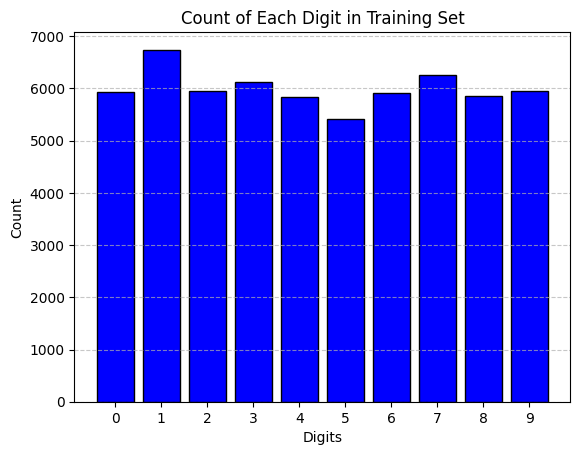

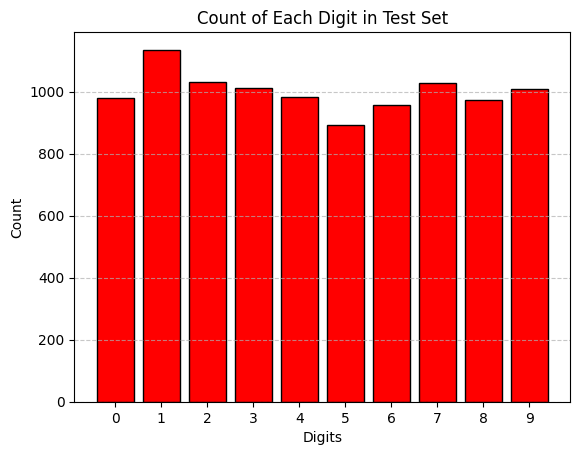

In [2]:
# Load the MNIST dataset, which is a large database of handwritten digits.
# The function returns two tuples: one for training data and one for testing data.
# Recalling, a Tuple is a collection of objects that are ordered and immutable.
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# First we convert the data to float32, which helps with numerical stability. A float32 provides sufficient precision, while also being memory efficient.
# Most modern CPU's and GPU's are optimized for float32 operations, making computations faster.
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

# Then we convert the training data to have a channel dimension, which is required for CNNs.
X_train = X_train[..., tf.newaxis] # Add the channel dimension
X_test = X_test[..., tf.newaxis] # Add the channel dimension
print(f"New shape for X_train for CNN's: {X_train.shape}")
print(f"New shape for X_test for CNN's: {X_test.shape}")

# Declare the types of the loaded data for clarity.
X_train: NDArray[np.float32]
Y_train: NDArray[np.uint8]
X_test: NDArray[np.float32]
Y_test: NDArray[np.uint8]

# We set the line width to a large value to avoid line breaks when printing the array.
with np.printoptions(linewidth=10000):
    # Print the shapes of the datasets to understand their dimensions.
    print("Shape of X_train:\t", X_train.shape)
    print("Shape of X_test:\t", X_test.shape)
    print("Shape of Y_train:\t", Y_train.shape)
    print("Shape of Y_test:\t", Y_test.shape)
    print(f"X_train data type: {X_train.dtype}")
    print(f"X_test data type: {X_test.dtype}")
    print(f"Y_train data type: {Y_train.dtype}")
    print(f"Y_test data type: {Y_test.dtype}")

    # Inspect a single data sample to see what it looks like.
    n: int = 5678
    print(f"\nX_train data {n}-th element (a 28x28 pixel image):\n", np.squeeze(X_train[n]))
    print("\nAnd its corresponding label:\t", Y_train[n])

    # TODO: For using this data in a neural network,
    # Tensorflow/Keras expects the input data to be in a 1D or 2D array format where each row represents a single sample and each column represents a feature. The general format for the input shape is: (batch_size, feature_1, feature_2, ...)
    # However, we can use the tf.keras.layers.Flatten layer as the first layer in our sequential model.
    # This layer automatically flattens the input shape without the need for manual reshaping of our data.
    # For a Dense (fully connected) network: We must flatten each 28x28 image into a single 1D array of 784 pixels. The input shape for the first layer of our model would then be (None, 784), where None represents a variable batch size.
    # For a Convolutional Neural Network (CNN): We must add a channel dimension. Since the images are grayscale, there is only one channel. We would reshape the data to (number_of_images, 28, 28, 1). The input shape for the first layer (typically a Conv2D layer) would be (28, 28, 1). The batch size is handled automatically by Keras.
    # Scaling can also be performd in the model using a tf.keras.layers.Rescaling or keras.layers.Normalization layer as the first layer in our sequential model.
    # The advantage of using these layers is that they integrate seamlessly into the model architecture, ensuring that the data is preprocessed consistently during both training and inference.
    # This approach also simplifies the code by reducing the need for separate preprocessing steps outside the model definition.
    # And, it ensures that inference data is processed in the same way as training data, which is crucial for maintaining model performance.

    # Analyze the distribution of the digits in the training set.
    # `np.unique` finds the unique digit labels and `return_counts=True` counts their occurrences.
    dataset_train_distribution: Tuple[np.ndarray, np.ndarray] = np.unique(Y_train, return_counts=True)
    digits_train: np.ndarray = dataset_train_distribution[0]
    counts_train: np.ndarray = dataset_train_distribution[1]
    
    print("\n--- Train Dataset Distribution ---")
    print("Digits:\t\t\t", digits_train)
    print("Count per digit:\t", counts_train)
    
    # Calculate basic statistics on the distribution.
    avg: float = np.mean(counts_train)
    print(f"Average sample size:\t {avg:.2f}")
    
    max_count_train: np.int64 = np.max(counts_train)
    min_count_train: np.int64 = np.min(counts_train)
    print(f"Maximum sample size:\t {max_count_train}")
    print(f"Minimum sample size:\t {min_count_train}")


    dataset_test_distribution: Tuple[np.ndarray, np.ndarray] = np.unique(Y_test, return_counts=True)
    digits_test: np.ndarray = dataset_test_distribution[0]
    counts_test: np.ndarray = dataset_test_distribution[1]
    
    print("\n--- Test Dataset Distribution ---")
    print("Digits:\t\t\t", digits_test)
    print("Count per digit:\t", counts_test)
    
    # Calculate basic statistics on the distribution.
    avg: float = np.mean(counts_test)
    print(f"Average sample size:\t {avg:.2f}")
    
    max_count_test: np.int64 = np.max(counts_test)
    min_count_test: np.int64 = np.min(counts_test)
    print(f"Maximum sample size:\t {max_count_test}")
    print(f"Minimum sample size:\t {min_count_test}")

# Create a bar chart from the counts and digits to visualize the distribution.
plt.bar(digits_train, counts_train, color='blue', edgecolor='black')

# Set the title and labels for clarity.
plt.title('Count of Each Digit in Training Set')
plt.xlabel('Digits')
plt.ylabel('Count')

# Set x-ticks to be at the center of each bar and label them with the digit.
plt.xticks(digits_train)

# Add a grid for better readability.
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot.
plt.show()

# Amd the same bar chart for the test set.

# Create a bar chart from the counts and digits to visualize the distribution.
plt.bar(digits_test, counts_test, color='red', edgecolor='black')

# Set the title and labels for clarity.
plt.title('Count of Each Digit in Test Set')
plt.xlabel('Digits')
plt.ylabel('Count')

# Set x-ticks to be at the center of each bar and label them with the digit.
plt.xticks(digits_test)

# Add a grid for better readability.
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot.
plt.show()

## Dataset Analysis

The content and size of the training and testing datasets align with the description on the Kaggle MNIST dataset page, Hojjat, F. (2017). MNIST: The Most Famous Dataset in the World. Kaggle. Retrieved August 28, 2025, from https://www.kaggle.com/datasets/hojjatk/mnist-dataset. The plot of digit distribution shows a fairly homogeneous representation across all classes (digits 0 through 9). While the digit '1' is slightly oversampled and the digit '5' is slightly undersampled, the class imbalance is not significant enough to warrant further action for this assessment.

In a scenario where the distribution were to be significantly imbalanced and we needed to make it more homogeneous, we would use a technique called **resampling**. Resampling involves adjusting the distribution of the training data to be more balanced. There are two primary types:

- **Oversampling** involves duplicating samples from the underrepresented classes to increase their frequency.

- **Undersampling** involves removing samples from the overrepresented classes to reduce their frequency.

## Part 1, Task 1: Creating a simple Multilayer Perceptron (MLP) neural network

The code below defines our base model.

To experiment with different architectures or tune its hyperparameters, we simply copy this entire cell and make our changes.

We need to make sure to give each new model a unique name. This ensures that when the ModelCheckpoint callback saves the best-performing version during training, the filename will be clear and identifiable.

In [3]:
# --- Set Seeds for Reproducibility ---

# This sets the global random seed for all TensorFlow operations.
# It ensures that things like model weight initialisation are the same every time.
# `tf.random.set_seed()` is the modern way to do this in TensorFlow 2.
tf.random.set_seed(1)

# This sets the random seed for all NumPy operations.
# This is important if we are creating our data using NumPy or using any
# NumPy functions that involve randomness.
np.random.seed(23)

In [4]:
def create_mlp_model() -> Sequential:
    """
    Defines and returns the (base) MLP model architecture.
    """
    # Note: we can change the model architecture here. However, it is more prudent to save the model parameters first, and then change it. 
    model = Sequential([
        # We use the implicit input_shape here for a cleaner look.
        Input(shape=(28, 28, 1)),
        Normalization(),
        Flatten(),
        Dense(units=128, activation='relu'),
        Dense(units=256, activation='relu'),
        Dense(units=64, activation='relu'),
        Dense(units=10, activation='softmax')
    ])
    return model

In [ ]:
def run_experiment(model_creation_func, hyperparameters, parent_folder, X_train, Y_train):
    """
    Runs a full training experiment for a given model architecture and hyperparameter set.
    """
    # Create the model instance first.
    model = model_creation_func()
    model.name = hyperparameters.get('model_name', 'unnamed_model')

    # --- Adapt the Normalisation Layer ---
    print("\nAdapting the normalisation layer...")
    # The adapt method is now called here, before the model is compiled or trained.
    model.layers[0].adapt(X_train)
    print("Adaptation complete.\n")

    print(f"\n--- Starting Experiment: {model.name} ---")

    # We can print a summary of the model's architecture to see the layers and parameter counts.
    print("\n--- Model Architecture ---")
    model.summary()
    # Generate and save the diagram as an image file
    plot_model(model, to_file=f'{model.name}_architecture.png', show_shapes=True, show_layer_names=True)

    # And we can also print the hyperparameters of the model.
    print("\n--- Hyperparameters ---")
    for key, value in hyperparameters.items():
        print(f"{key:<20}: {value}")

    # --- Initialise WandB Run and Callbacks ---
    # The callbacks and WandB run are configured AFTER the model is fully built and adapted.
    run_name = f"{model.name}-lr_{hyperparameters.get('learning_rate', 0.001)}-bs_{hyperparameters.get('batch_size', 64)}-{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
    local_run_dir = os.path.join(os.getcwd(), "wandb", run_name)
    os.makedirs(local_run_dir, exist_ok=True)

    run = wandb.init(
        project="CSE5ML-Assessment2",
        name=run_name,
        config=hyperparameters,
        dir=local_run_dir,
    )

    log_dir = os.path.join(parent_folder, "logs", model.name, datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
    wandb_metrics_logger = WandbMetricsLogger()

    # --- Configure the Optimiser ---
    optimiser_name = hyperparameters.get('optimiser', 'adam').lower()
    learning_rate = hyperparameters.get('learning_rate', 0.001)

    if optimiser_name == 'adam':
        optimiser = Adam(learning_rate=learning_rate)
    elif optimiser_name == 'sgd':
        optimiser = SGD(learning_rate=learning_rate)
    else:
        optimiser = optimiser_name

    # --- Configure the ModelCheckpoint Callback ---
    model_specific_folder = os.path.join(parent_folder, model.name)
    os.makedirs(model_specific_folder, exist_ok=True)
    filepath = os.path.join(model_specific_folder, 'best_model_epoch-{epoch:02d}_val_acc-{val_accuracy:.4f}.keras')
    checkpoint = ModelCheckpoint(
        filepath=filepath,
        monitor='val_accuracy',
        mode='max',
        save_best_only=True,
        verbose=1
    )

    # --- Compile the Model ---
    model.compile(
        optimizer=optimiser,
        loss=hyperparameters.get('loss_function', 'sparse_categorical_crossentropy'),
        metrics=['accuracy']
    )

    # --- Train the Model ---
    history = model.fit(
        X_train,
        Y_train,
        epochs=hyperparameters.get('epochs', 10),
        batch_size=hyperparameters.get('batch_size', 64),
        validation_split=0.1,
        callbacks=[checkpoint, wandb_metrics_logger, tensorboard_callback],
        verbose=1
    )

    # The history.history dictionary contains a list of validation accuracies for each epoch.
    val_accuracies = history.history['val_accuracy']
    best_validation_accuracy = max(val_accuracies)
    best_epoch = val_accuracies.index(best_validation_accuracy) + 1
    associated_train_acc = history.history['accuracy'][best_epoch - 1]

    print("\n--- Peak Performance Summary ---")
    print(f"{'Best validation accuracy:':<35} {best_validation_accuracy:.4f}")
    print(f"{'Associated training accuracy:':<35} {associated_train_acc:.4f}")
    print(f"{'Occurred at epoch:':<35} {best_epoch}")

    return history

In [6]:
# --- Define Hyperparameter Sets ---

mlp_epochs = 5
mlp_batch_size = 64
# Experiment 1: Our baseline run
mlp_exp_1_config = {
    "model_name": "MLP_Baseline_Run",
    "optimiser": "Adam",
    "learning_rate": 0.01,
    "epochs": mlp_epochs,
    "batch_size": mlp_batch_size
}

# Experiment 2: A different setup with a lower learning rate, more epochs, and a smaller batch size
mlp_exp_2_config = {
    "model_name": "MLP_Slow_Learn_Run",
    "optimiser": "Adam",
    "learning_rate": 0.001,
    "epochs": mlp_epochs,
    "batch_size": mlp_batch_size,
}

mlp_exp_3_config = {
    "model_name": "MLP_SGD_Learn_Run",
    "optimiser": "SGD",
    "learning_rate": 0.01,
    "epochs": mlp_epochs,
    "batch_size": mlp_batch_size,
}

mlp_exp_4_config = {
    "model_name": "MLP_SGD_Slow_Learn_Run",
    "optimiser": "SGD",
    "learning_rate": 0.001,
    "epochs": mlp_epochs,
    "batch_size": mlp_batch_size,
}

In [7]:
# --- Run the first experiment ---

mlp_histories = []
mlp_history_1 = run_experiment(
    model_creation_func=create_mlp_model, 
    hyperparameters=mlp_exp_1_config,
    parent_folder='MLP_Models',
    X_train=X_train,
    Y_train=Y_train
)
mlp_histories.append(mlp_history_1)

# # --- To run the second experiment, we just call it again with the other config :-)
# mlp_history_2 = run_experiment(
#     model_creation_func=create_mlp_model, 
#     hyperparameters=mlp_exp_2_config,
#     parent_folder='MLP_Models',
#     X_train=X_train,
#     Y_train=Y_train
# )
# mlp_histories.append(mlp_history_2)

# mlp_history_3 = run_experiment(
#     model_creation_func=create_mlp_model, 
#     hyperparameters=mlp_exp_3_config,
#     parent_folder='MLP_Models',
#     X_train=X_train,
#     Y_train=Y_train
# )
# mlp_histories.append(mlp_history_3)


# mlp_history_4 = run_experiment(
#     model_creation_func=create_mlp_model, 
#     hyperparameters=mlp_exp_4_config,
#     parent_folder='MLP_Models',
#     X_train=X_train,
#     Y_train=Y_train
# )
# mlp_histories.append(mlp_history_4)


Adapting the normalisation layer...
Adaptation complete.


--- Starting Experiment: MLP_Baseline_Run ---

--- Model Architecture ---


Model: "MLP_Baseline_Run"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 28, 28, 1)      │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 150,605 (588.30 KB)

 Trainable params: 150,602 (588.29 KB)

 Non-trainable params: 3 (16.00 B)


--- Hyperparameters ---
model_name          : MLP_Baseline_Run
optimiser           : Adam
learning_rate       : 0.01
epochs              : 5
batch_size          : 64


wandb: Currently logged in as: tim-vos-nl (tim-vos-nl-mine) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch 1/5
830/844 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8380 - loss: 0.5536
Epoch 1: val_accuracy improved from None to 0.95467, saving model to MLP_Models\MLP_Baseline_Run\best_model_epoch-01_val_acc-0.9547.keras
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9005 - loss: 0.3446 - val_accuracy: 0.9547 - val_loss: 0.1590
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9352 - loss: 0.2305
Epoch 2: val_accuracy improved from 0.95467 to 0.95933, saving model to MLP_Models\MLP_Baseline_Run\best_model_epoch-02_val_acc-0.9593.keras
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9369 - loss: 0.2275 - val_accuracy: 0.9593 - val_loss: 0.1576
Epoch 3/5
830/844 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9426 - loss: 0.2079
Epoch 3: val_accuracy improved from 0.95933 to 0.96317, saving model to MLP_Models\MLP_Baseline_Run\best_model_epoch-03_val_acc-0.9632.keras
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9442 - loss: 0.2092 - val_accuracy: 

# Notes on Sparse Categorical Loss vs. Categorical Loss
# Understanding Cross-Entropy Loss

At its heart, **cross-entropy** is a concept from information theory that measures how different two probability distributions are. In the context of training a neural network for classification, we use it to measure the "distance" between the model's predicted probability distribution and the true probability distribution of the labels. The goal of training is to minimise this distance, effectively making the model's predictions more accurate (Goodfellow et al., 2016).

---
### Categorical Cross-Entropy (for One-Hot Labels)

You use this loss function when your labels are explicitly **one-hot encoded** (e.g., the digit `3` is represented as `[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]`). The formula for a single sample is:

$$L = -\sum_{i=0}^{C-1} y_i \log(\hat{y}_i)$$

-   $L$ is the final loss value for the sample.
-   $C$ is the total number of classes (e.g., 10 for MNIST).
-   $y_i$ is the ground truth (it is `1` for the correct class and `0` for all others).
-   $\hat{y}_i$ is the model's predicted probability for class $i$.

Because the `y` vector is almost all zeros, the summation simplifies to just the negative logarithm of the probability the model assigned to the single correct class. For a label of `3`, the loss simply becomes $L = -\log(\hat{y}_3)$.

---
### Sparse Categorical Cross-Entropy (for Integer Labels)

This is a more computationally and memory-efficient version used when your labels are simple **integers** (e.g., `3`). It arrives at the exact same mathematical result but skips the need for the one-hot encoded vector.

The formula is a direct implementation of the simplified logic:

$$L = -\log(\hat{y}_c)$$

-   $L$ is the final loss value for the sample.
-   $c$ is the integer representing the correct class (e.g., `c = 3`).
-   $\hat{y}_c$ is the model's predicted probability for that correct class $c$.

As Chollet (2021) explains, both formulas compute the exact same value. The choice is purely a practical one based on the format of your labels, not a mathematical one that affects the model's learning.

---
**References**

Chollet, F. (2021). *Deep learning with Python* (2nd ed.). Shelter Island, NY: Manning Publications.

Goodfellow, I., Bengio, Y., & Courville, A. (2016). *Deep learning*. Cambridge, MA: MIT Press.

## Part 1, Task 2: Creating a simple Convolutional Neural Network (CNN)

The code below defines our base model.

To experiment with different architectures or tune its hyperparameters, we simply copy this entire cell and make our changes.

We need to make sure to give each new model a unique name. This ensures that when the ModelCheckpoint callback saves the best-performing version during training, the filename will be clear and identifiable.

In [ ]:
def create_cnn_model() -> Sequential:
    """
    Defines and returns the base CNN model architecture.
    """
    model = Sequential([
        # Preprocessing layers
        Normalization(input_shape=(28, 28, 1)),
        
        # --- Convolutional Block 1 ---
        Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),

        # --- Convolutional Block 2 ---
        Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        
        # --- Classification Head ---
        Flatten(),
        Dropout(0.5),
        Dense(units=128, activation='relu'),
        Dense(units=10, activation='softmax')
    ])
    return model

In [ ]:
# --- Define Hyperparameter Set for the Base CNN ---
cnn_epochs = 5
cnn_batch_size = 64
cnn_exp_1_config = {
    "model_name": "CNN_Base",
    "optimiser": "Adam",
    "learning_rate": 0.01,
    "epochs": cnn_epochs,
    "batch_size": cnn_batch_size
}
cnn_exp_2_config = {
    "model_name": "CNN_Slow_Learn",
    "optimiser": "Adam",
    "learning_rate": 0.001,
    "epochs": cnn_epochs,
    "batch_size": cnn_batch_size
}

cnn_exp_3_config = {
    "model_name": "CNN_SGD",
    "optimiser": "SGD",
    "learning_rate": 0.01,
    "epochs": cnn_epochs,
    "batch_size": cnn_batch_size
}

cnn_exp_4_config = {
    "model_name": "CNN_SGD_Slow_Learn",
    "optimiser": "SGD",
    "learning_rate": 0.001,
    "epochs": cnn_epochs,
    "batch_size": cnn_batch_size
}

In [ ]:
# --- Run the CNN experiment ---
cnn_histories = []
cnn_history_1 = run_experiment(
    model_creation_func=create_cnn_model, 
    hyperparameters=cnn_exp_1_config,
    parent_folder='CNN_Models',
    X_train=X_train, 
    Y_train=Y_train
)
cnn_histories.append(cnn_history_1)

cnn_history_2 = run_experiment(
    model_creation_func=create_cnn_model, 
    hyperparameters=cnn_exp_2_config,
    parent_folder='CNN_Models',
    X_train=X_train, 
    Y_train=Y_train
)
cnn_histories.append(cnn_history_2)

cnn_history_3 = run_experiment(
    model_creation_func=create_cnn_model, 
    hyperparameters=cnn_exp_3_config,
    parent_folder='CNN_Models',
    X_train=X_train, 
    Y_train=Y_train
)
cnn_histories.append(cnn_history_3)

cnn_history_4 = run_experiment(
    model_creation_func=create_cnn_model, 
    hyperparameters=cnn_exp_4_config,
    parent_folder='CNN_Models',
    X_train=X_train, 
    Y_train=Y_train
)
cnn_histories.append(cnn_history_4)


In [8]:
# --- Define the Plotting Function ---
def plot_training_history(history: History):
    # summarize history for accuracy
    plt.plot(history.history['accuracy']) # the train accuracy
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{history.model.name} model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

    # summarize history for loss
    plt.plot(history.history['loss']) # the train loss
    plt.plot(history.history['val_loss'])
    plt.title(f'{history.model.name} model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

### Plot the results of every epoc

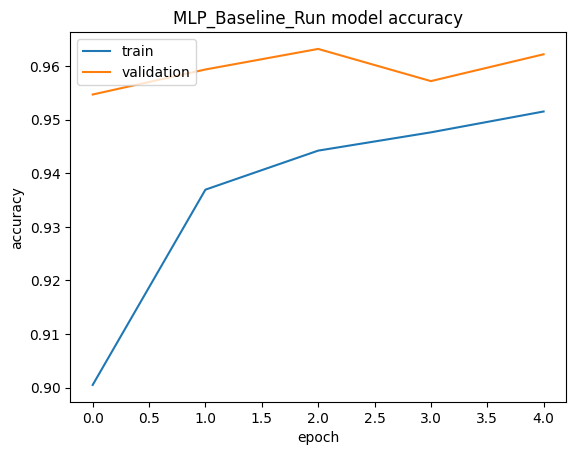

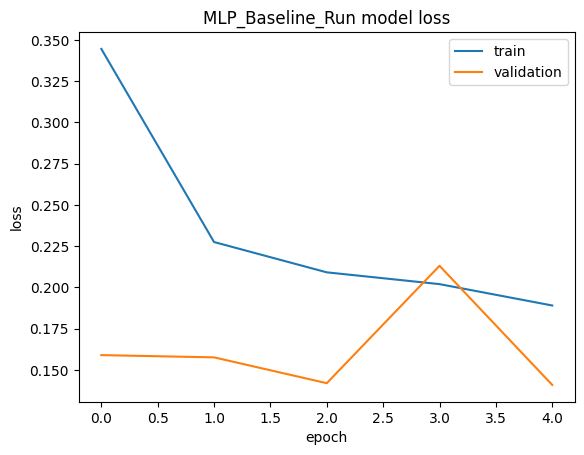

----------------------------------------------------------------------------------------------------


NameError: name 'cnn_histories' is not defined

In [9]:
def print_training_histories(histories):
    for history in histories:
        plot_training_history(history)
        print("-"*100)

print_training_histories(mlp_histories)
print_training_histories(cnn_histories)

## Testing the models on the held-out test set
We test the model on the test data, which is data that the model has never seen before. Then we verify the model's real-world accuracy. It is expected that this does not deviate much from the validation sets, because the MNIST dataset contains images that are very clean and simple:
- They are small (28 x 28 pixels only).
- The digits are centered and normalised in size.
- The background is a solid colour with no distracting noise.
  
Because of this simplicity, the patterns that differentiate one digit from another (e.g., a "1" is a vertical line, an "8" is two loops) are very strong and easy for our model to learn.

First we define a function that browser to a folder with saved models, extracts the file with the highest validation accuracy in its name, loads it and tests it with the held-out X_test and Y_test. 

A function is convenient because we will use it on different models, with different hyperparameters and hence, avoid repetition. 

In [10]:
def find_load_and_analyse_best_model(
    parent_folder: str, # Changed name for clarity
    x_test_data: NDArray[np.float32], 
    y_test_data: NDArray[np.int_]
) -> Tuple[tf.keras.Model | None, float | None, float | None]:
    """
    Recursively searches through all subfolders in a parent directory to find the
    single best Keras model, then loads and analyses it.
    """
    best_model_path = None # We will now store the full path directly
    best_val_accuracy = -1.0

    pattern = re.compile(r"val_acc-([\d.]+)\.keras")

    if not os.path.isdir(parent_folder):
        print(f"Error: Parent directory not found at '{parent_folder}'")
        return None, None, None

    # --- NEW: Use os.walk() to search through all subdirectories ---
    # os.walk() goes through a directory tree top-down.
    for dirpath, _, filenames in os.walk(parent_folder):
        for filename in filenames:
            match = pattern.search(filename)
            if match:
                val_accuracy = float(match.group(1))
                if val_accuracy > best_val_accuracy:
                    best_val_accuracy = val_accuracy
                    # Construct and store the full path to this new best model
                    best_model_path = os.path.join(dirpath, filename)
    
    # The rest of the function works perfectly, we just need to use best_model_path
    if best_model_path:
        print(f"Found and loading best model across all experiments: {best_model_path}")
        
        loaded_model = tf.keras.models.load_model(best_model_path)
        
        # --- Print Compiled Hyperparameters ---
        print("\n--- Key Hyperparameters ---")
        # Gets the configuration of the model's optimiser.
        optimiser_config = loaded_model.optimizer.get_config()
        optimiser_name = optimiser_config['name']
        learning_rate = optimiser_config['learning_rate']
        
        # Gets the name of the loss function the model was compiled with.
        loss_function = loaded_model.loss
        
        print(f"{'Optimiser:':<20} {optimiser_name}")
        print(f"{'Learning Rate:':<20} {learning_rate}")
        print(f"{'Loss Function:':<20} {loss_function}")
        
        # Prints a summary table of the model's architecture.
        print("\n--- Best Model Summary (Architecture) ---")
        loaded_model.summary()

        # Evaluates the loaded model's performance on the unseen test data.
        print("\n--- Evaluating model performance on the test set ---")
        loss, accuracy = loaded_model.evaluate(x_test_data, y_test_data, verbose=1)
        
        # Prints the final evaluation results, formatted to 4 decimal places.
        print(f"\nTest Set Loss: {loss:.4f}")
        print(f"Test Set Accuracy: {accuracy:.4f}")

        # --- Generate Detailed Performance Analysis ---
        print("\n--- Detailed Analysis ---")
        
        # Use the model to predict the class for each image in the test set.
        y_pred_probabilities = loaded_model.predict(x_test_data)
        # The model outputs probabilities; we use np.argmax to find the class with the highest probability.
        y_pred = np.argmax(y_pred_probabilities, axis=1)

        # Generate and print a text report showing precision, recall, and f1-score for each digit.
        print("\n--- Classification Report ---")
        report = classification_report(y_test_data, y_pred, target_names=[str(i) for i in range(10)])
        print(report)

        # Generate and plot a confusion matrix to visualise which digits are being confused.
        print("\n--- Confusion Matrix ---")
        cm = confusion_matrix(y_test_data, y_pred)
        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Predicted Label')
        plt.ylabel('Actual Label')
        plt.title(f'Confusion Matrix for {loaded_model.name}')
        plt.show()
        
        # Returns the loaded model object and its performance metrics for potential further use.
        return loaded_model, accuracy, loss
    else:
        # If no model files matching the pattern were found, print a message and return nothing.
        print(f"No model files found in any subfolders of '{parent_folder}'.")
        return None, None, None

### Testing the MLP model

Found and loading best model across all experiments: MLP_Models\MLP_Baseline_Run\best_model_epoch-03_val_acc-0.9632.keras

--- Key Hyperparameters ---
Optimiser:           adam
Learning Rate:       0.009999999776482582
Loss Function:       sparse_categorical_crossentropy

--- Best Model Summary (Architecture) ---


Model: "MLP_Baseline_Run"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 28, 28, 1)      │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 451,811 (1.72 MB)

 Trainable params: 150,602 (588.29 KB)

 Non-trainable params: 3 (16.00 B)

 Optimizer params: 301,206 (1.15 MB)


--- Evaluating model performance on the test set ---
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9546 - loss: 0.1789

Test Set Loss: 0.1789
Test Set Accuracy: 0.9546

--- Detailed Analysis ---
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.98      0.99      0.99      1135
           2       0.96      0.94      0.95      1032
           3       0.93      0.97      0.95      1010
           4       0.98      0.92      0.94       982
           5       0.98      0.92      0.95       892
           6       0.95      0.97      0.96       958
           7       0.95      0.96      0.95      1028
           8       0.92      0.96      0.94       974
           9       0.94      0.92      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       

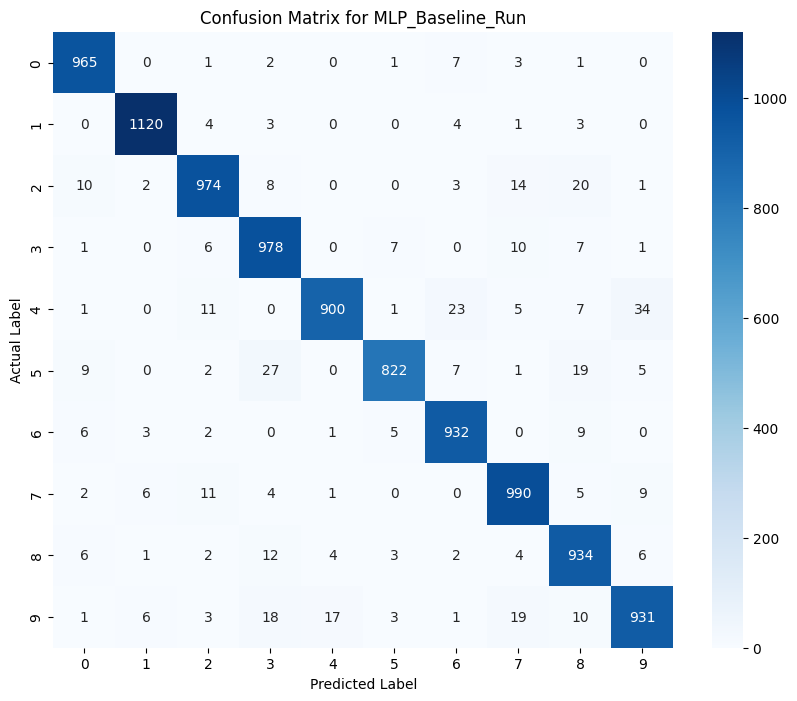

In [11]:
model_folder="MLP_Models"
# To capture the output, assign it to variables
best_model, test_acc, test_loss = find_load_and_analyse_best_model(
    parent_folder=model_folder,
    x_test_data=X_test,
    y_test_data=Y_test
)



### Testing the CNN model

In [ ]:
model_folder='CNN_Models'
# To capture the output, assign it to variables
best_model, test_acc, test_loss = find_load_and_analyse_best_model(
    parent_folder=model_folder,
    x_test_data=X_test,
    y_test_data=Y_test
)




# Future to do's (not part of this assessment)
- Implement KerasTuner, to automatically train and test models with a plethora of hyperparamaters, optimisers, loss functions:

We first need to install it first: uv pip install keras-tuner
import keras_tuner

def build_model(hp):
    """This is our hypermodel, which defines the search space."""
    
    model = Sequential(name="Tuned_MLP")
    model.add(Input(shape=(28, 28)))
    model.add(Normalization())
    model.add(Flatten())
    
    # --- Define Hyperparameters to Tune ---
    # Tune the number of units in the first Dense layer
    hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
    model.add(Dense(units=hp_units, activation='relu'))
    
    # Tune the learning rate
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    
    # Add the output layer
    model.add(Dense(10, activation='softmax'))

    # --- Compile the model inside the function ---
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

--- Set up the Tuner ---
### We'll use RandomSearch, which randomly tries combinations.
tuner = keras_tuner.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # The total number of model variations to test
    executions_per_trial=2, # The number of times to train each model variation
    directory='tuning_results',
    project_name='MNIST_Tuning'
)

### --- Start the Search ---
### This is like model.fit(), but it runs the whole tuning process.
tuner.search(X_train, Y_train, epochs=10, validation_split=0.1)

### --- Get the Best Model ---
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

print("\n--- Best Hyperparameters Found ---")
print(best_hyperparameters.values)

print("\n--- Evaluating the Best Model Found by the Tuner ---")
best_model.evaluate(X_test, Y_test)

# Testing a new approach (Future to do)
### A Base Class for models, with a common interface and allowing for inheriting layers, inheriting behaviour and a common interface.

In [ ]:
# models.py
# This file serves as a centralised factory for creating our neural network models.
# It uses a class-based, inherited structure to keep the codebase organised and extensible.

import tensorflow as tf
from tensorflow.keras.layers import Normalization, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model

class BaseNeuralNetwork(Model):
    """
    A base class for all neural networks in this project.
    It encapsulates the common input and preprocessing layers that all models will share.
    """
    def __init__(self, **kwargs):
        # We call the parent constructor to ensure correct initialisation of the Keras Model.
        # **kwargs allows us to pass additional arguments like 'name' when creating subclasses.
        super().__init__(**kwargs)
        # These layers are common to all models and are defined here once for efficiency.
        self.normalization_layer = Normalization(name="normalization_layer")
        self.flatten_layer = Flatten(name="flatten_layer")

    def call(self, inputs):
        """
        Defines the forward pass for the common preprocessing layers.
        """
        # The input data is passed through the normalisation and flattening layers.
        x = self.normalization_layer(inputs)
        x = self.flatten_layer(x)
        return x

class MLPModel(BaseNeuralNetwork):
    """
    A standard Multi-Layer Perceptron (MLP) model.
    It inherits the base preprocessing from BaseNeuralNetwork and adds dense layers.
    """
    def __init__(self, num_units_1: int = 128, num_units_2: int = 256, num_units_3: int = 64, num_classes: int = 10, **kwargs):
        # We call the parent constructor and provide a specific name for this model.
        super().__init__(name='mlp_model', **kwargs)
        # Define the unique dense layers for this specific model architecture.
        self.dense_1 = Dense(units=num_units_1, activation='relu', name="dense_1")
        self.dense_2 = Dense(units=num_units_2, activation='relu', name="dense_2")
        self.dense_3 = Dense(units=num_units_3, activation='relu', name="dense_3")
        self.output_layer = Dense(units=num_classes, activation='softmax', name="output_layer")

    def call(self, inputs):
        # First, we process the input using the base class's call method.
        x = super().call(inputs)
        # Then, we pass the output through the MLP-specific layers.
        x = self.dense_1(x)
        x = self.dense_2(x)
        x = self.dense_3(x)
        return self.output_layer(x)

class MLP_Wide_Model(BaseNeuralNetwork):
    """
    A wider, shallower MLP model. This is a variation for experimentation.
    """
    def __init__(self, num_units_1: int = 256, num_units_2: int = 128, num_classes: int = 10, **kwargs):
        super().__init__(name='mlp_wide_model', **kwargs)
        # This model has a different configuration of dense layers.
        self.dense_1 = Dense(units=num_units_1, activation='relu', name="dense_1")
        self.dense_2 = Dense(units=num_units_2, activation='relu', name="dense_2")
        self.output_layer = Dense(units=num_classes, activation='softmax', name="output_layer")

    def call(self, inputs):
        x = super().call(inputs)
        x = self.dense_1(x)
        x = self.dense_2(x)
        return self.output_layer(x)

class SimpleCNN(BaseNeuralNetwork):
    """
    A simple Convolutional Neural Network (CNN) model for image classification.
    """
    def __init__(self, num_classes: int = 10, **kwargs):
        super().__init__(name='simple_cnn', **kwargs)
        # The convolutional and pooling layers are unique to CNNs.
        self.conv1 = Conv2D(filters=32, kernel_size=(3, 3), activation='relu', name="conv1")
        self.pool1 = MaxPooling2D(pool_size=(2, 2), name="pool1")
        self.conv2 = Conv2D(filters=64, kernel_size=(3, 3), activation='relu', name="conv2")
        self.pool2 = MaxPooling2D(pool_size=(2, 2), name="pool2")
        self.output_layer = Dense(units=num_classes, activation='softmax', name="output_layer")

    def call(self, inputs):
        # We start by using the base class's normalisation.
        x = self.normalization_layer(inputs)
        
        # Then, we pass the output through the CNN-specific layers.
        x = self.conv1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.pool2(x)

        # The flatten layer from the base class is still applied before the output layer.
        x = self.flatten_layer(x)
        
        return self.output_layer(x)

class DeepCNN(BaseNeuralNetwork):
    """
    A deeper CNN model with more layers for greater representational capacity.
    """
    def __init__(self, num_classes: int = 10, **kwargs):
        super().__init__(name='deep_cnn', **kwargs)
        # This model has a more complex arrangement of convolutional layers.
        self.conv1 = Conv2D(32, (3, 3), activation='relu')
        self.conv2 = Conv2D(32, (3, 3), activation='relu')
        self.pool1 = MaxPooling2D(pool_size=(2, 2))
        self.conv3 = Conv2D(64, (3, 3), activation='relu')
        self.conv4 = Conv2D(64, (3, 3), activation='relu')
        self.pool2 = MaxPooling2D(pool_size=(2, 2))
        self.dense1 = Dense(128, activation='relu')
        self.output_layer = Dense(units=num_classes, activation='softmax')

    def call(self, inputs):
        x = self.normalization_layer(inputs)
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.pool1(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.pool2(x)
        x = self.flatten_layer(x)
        x = self.dense1(x)
        return self.output_layer(x)

def create_model_from_class(model_class: type, input_shape, **kwargs):
    """
    A helper function to instantiate a model class with a defined input shape.
    It automatically builds the model for you.
    """
    model_instance = model_class(**kwargs)
    # The build method ensures that the model's layers are initialised with the correct input shape.
    model_instance.build(input_shape=(None,) + input_shape)
    return model_instance